<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Calculate the online purchase rates during online shopping sessions by customer type for November and December.
# Subset dataframe for November and December data
shopping_Nov_Dec = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Preview to make sure the subset is correct
shopping_Nov_Dec.head()


,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
5463,5464,1,39.2,2,120.8,7,80.500000,0.000000,0.010000,0.000000,0.0,True,Nov,New_Customer,0.0
5464,5465,3,89.6,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,True,Nov,Returning_Customer,1.0
5467,5468,4,204.2,0,0.0,31,652.376667,0.012121,0.016162,0.000000,0.0,False,Nov,Returning_Customer,0.0
5479,5480,0,0.0,0,0.0,13,710.066667,0.000000,0.007692,72.522838,0.0,False,Nov,Returning_Customer,1.0
5494,5495,0,0.0,0,0.0,24,968.692424,0.000000,0.000000,106.252517,0.0,False,Nov,Returning_Customer,1.0


In [8]:
# Get session frequency stats by CustomerType and Purchase
count_session = shopping_Nov_Dec.groupby(['CustomerType'])['Purchase'].value_counts()
print(count_session)

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64


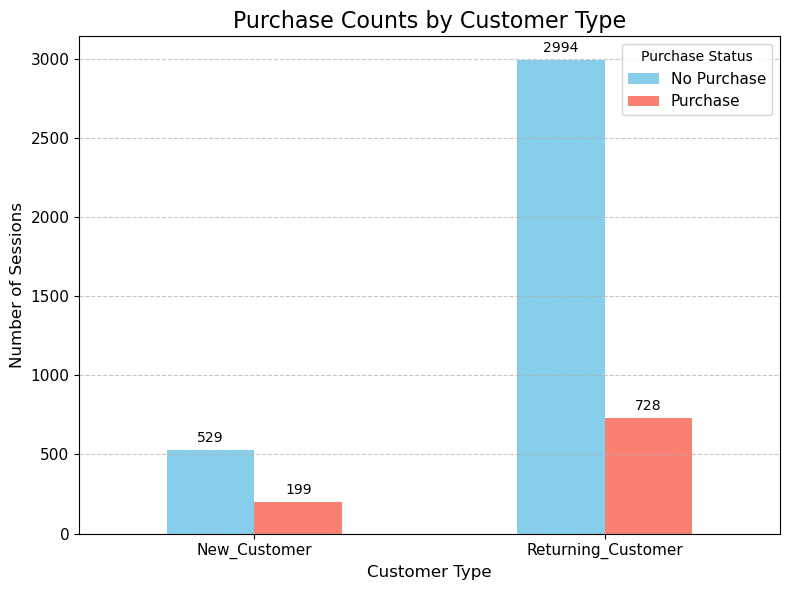

In [9]:
counts = {
    'New_Customer': [529, 199],  # Purchase=0.0, Purchase=1.0
    'Returning_Customer': [2994, 728]
}
labels = ['No Purchase', 'Purchase']
customer_types = ['New_Customer', 'Returning_Customer']

# Convert data into a DataFrame for easier handling
df_counts = pd.DataFrame(counts, index=labels)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
df_counts.T.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])

# Customize the plot
plt.title("Purchase Counts by Customer Type", fontsize=16)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Number of Sessions", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Purchase Status", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [10]:
# Total number of session by CustomerType
total_new_customer = np.sum(count_session['New_Customer'])
total_returning_customer = np.sum(count_session['Returning_Customer'])

# Total number of purchase by CustomerType
purchase_new_customer = count_session[('New_Customer', 1)]
purchase_returning_customer = count_session[('Returning_Customer', 1)]

# Calculate purchase rates
purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_returning = purchase_returning_customer / total_returning_customer

# Therefore, the online purchase for the returning customers is lower than that of the new customers.
purchase_rates = {"Returning_Customer": purchase_rate_returning, "New_Customer": purchase_rate_new}
print(purchase_rates)

{'Returning_Customer': 0.1955937667920473, 'New_Customer': 0.2733516483516483}


In [13]:
## Identify the strongest correlation in total time spent between different types of pages visited by the returning customers during the months of November and December. 
shopping_Nov_Dec[['Administrative_Duration','Informational_Duration','ProductRelated_Duration' ]].corr()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Administrative_Duration,1.000000,0.244689,0.389855
Informational_Duration,0.244689,1.000000,0.367126
ProductRelated_Duration,0.389855,0.367126,1.000000


In [14]:
# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206961}


### A new campaign for the returning customers will boost the purchase rate by 15%. 
### What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?

In [15]:
# Purchase is a binomial random variable taking the value of either 0 or 1
# We know that the current purchase rate for the returning customers is
print("Current purchase rate for the returning customer:", purchase_rate_returning)

Current purchase rate for the returning customer: 0.1955937667920473


In [16]:
# 15% Increase in this rate would be
increased_purchase_rate_returning = 1.15 * purchase_rate_returning
print("Increased purchase rate for the returning customer:", increased_purchase_rate_returning)

Increased purchase rate for the returning customer: 0.22493283181085436


In [17]:
# First, we find the likelihood of having <100 sales of 500 sessions
# We can find this from binomial cdf
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_purchase_rate_returning)
print("probability of having <100 sales:", prob_sales_100_less)

probability of having <100 sales: 0.09877786609627337


In [18]:
# Then, to find the probability of having 100 or more sales is 1-prob_sales_100_less
prob_at_least_100_sales = 1 - prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037266


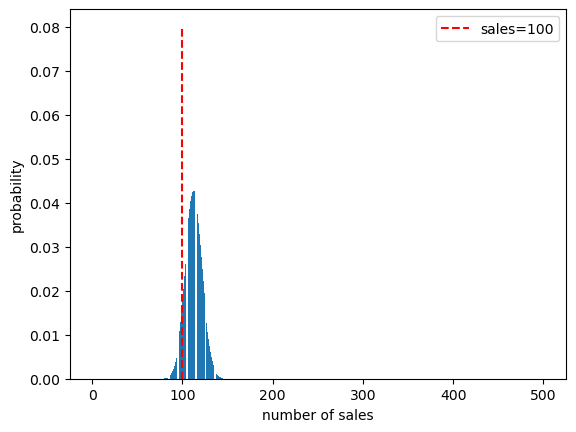

In [19]:
# Plotting the binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate_returning) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()

### Does the campaign actually increase the purchase rate for returning customers to 22.49% or more, and is the observed improvement statistically significant?

# A/B Testing for Marketing Campaign Effectiveness

## **Introduction**

In the competitive world of online shopping, improving customer engagement and increasing purchase rates are critical goals. Data analysis revealed a key insight: **Returning customers have a lower purchase rate around 19.56% compared to new customers around 27.34%**. This is concerning because returning customers often contribute significantly to long-term revenue and loyalty.

To address this, we decided to test whether a **new marketing campaign** (e.g., personalized offers or discounts) could boost the purchase rate of returning customers. However, simply observing changes in purchase rates after implementing the campaign does not guarantee that the campaign caused the improvement. This is where **A/B testing** comes in.

---

## **Why A/B Testing?**

A/B testing allows us to isolate the **causal effect** of the campaign by creating two comparable groups:
1. **Control Group (A):** Customers who do not receive the campaign (baseline behavior).
2. **Treatment Group (B):** Customers who receive the campaign.

### **Key Benefits of A/B Testing:**
- **Random Assignment**: Ensures the groups are comparable and minimizes biases.
- **Causal Inference**: Helps determine whether the observed changes are due to the campaign or random fluctuations.
- **Actionable Insights**: Quantifies the effectiveness of the campaign to guide decision-making.

### **Metrics of Success**
- The primary metric is the **purchase rate** (proportion of sessions leading to purchases).
- Success is defined as a **statistically significant** increase in the purchase rate for the Treatment Group (B) compared to the Control Group (A).

### **Hypotheses**
- **Null Hypothesis (\(H_0\))**: The campaign does not affect the purchase rate of returning customers.
- **Alternative Hypothesis (\(H_1\))**: The campaign increases the purchase rate of returning customers.


In [24]:
# Create a true copy of the filtered DataFrame
returning_customers = shopping_Nov_Dec[shopping_Nov_Dec['CustomerType'] == 'Returning_Customer'].copy()

# Assign Control (A) and Treatment (B) groups
np.random.seed(42)  # Reproducibility
returning_customers.loc[:, 'Group'] = np.random.choice(['A', 'B'], size=returning_customers.shape[0])

# Define the adjusted purchase rate for Treatment (B) with a 15% boost
required_improvement = 0.15  # 15% increase
adjusted_rate_treatment = purchase_rate_returning * (1 + required_improvement)

# Simulate purchases based on group
def simulate_purchase(row):
    if row['Group'] == 'B':  # Treatment Group
        return 1 if np.random.rand() < adjusted_rate_treatment else 0
    else:  # Control Group
        return 1 if np.random.rand() < purchase_rate_returning else 0

returning_customers.loc[:, 'Simulated_Purchase'] = returning_customers.apply(simulate_purchase, axis=1)

# Calculate Purchase Rates
group_purchase_rates = returning_customers.groupby('Group')['Simulated_Purchase'].mean()
print("Simulated Purchase Rates:")
print(group_purchase_rates)

# Perform Chi-Squared Test
contingency_table = pd.crosstab(returning_customers['Group'], returning_customers['Simulated_Purchase'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Interpretation
print("\nChi-Squared Statistic:", chi2)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The difference in purchase rates is statistically significant. The campaign is effective.")
else:
    print("The difference in purchase rates is not statistically significant. The campaign's effect cannot be confirmed.")

Simulated Purchase Rates:
Group
A    0.194519
B    0.220849
Name: Simulated_Purchase, dtype: float64

Chi-Squared Statistic: 3.761876874525406
P-Value: 0.052433691490813915
The difference in purchase rates is not statistically significant. The campaign's effect cannot be confirmed.


**Conclusion:**

- The observed improvement (22.08% vs. 19.45%) **is not statistically significant** at the 5% level.We cannot confidently attribute the increased purchase rate to the campaign.
- The campaign increased purchase rates slightly (22.08% vs. 19.45%), but the difference is too small to be confident that the campaign caused this change.